System Setup
List of all the python libraries that are required

* numpy
* pandas
* matplotlib
* seaborn
* wordcloud
* emoji


Run the following command to get all the listed python libraries

**pip install numpy pandas matplotlib seaborn wordcloud emoji --upgrade**

Te check whether do you all the required libraries the next should run without any errors

Let's begin by importing the required libraries

In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning

Regex cheatsheet

https://www.rexegg.com/regex-quickstart.html


Regex test - live

https://regexr.com/


Datetime format

http://strftime.org/

Use a custom a regex and datatime format by reffering to the above links if you run into empty df or format errors. As the exports from whatsapp are not standardized.



In [2]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = rawToDf('chat-data.txt', '24hr')

In [4]:
df.shape

(7097, 3)

In [5]:
df.head()

,date_time,user,msg
0,2020-09-28 13:00:00,grp_notif,Messages and calls are end-to-end encrypted. N...
1,2020-09-28 13:00:00,grp_notif,"Ria Christ created group ""Haramkhor🤒🤑😛"""
2,2020-09-28 13:00:00,grp_notif,Ria Christ added you
3,2020-09-28 13:01:00,grp_notif,Ria Christ changed this group's icon
4,2020-09-28 13:01:00,grp_notif,You're now an admin


## Data Cleaning



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  6406 non-null   datetime64[ns]
 1   user       6406 non-null   object        
 2   msg        6406 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 150.3+ KB


In [18]:
df.describe

<bound method NDFrame.describe of                date_time  ...                                                msg
0    2020-09-29 08:59:00  ...                      Kya bol raha hai yeh chutiya 
1    2020-09-29 09:00:00  ...                  Pata nahi Unmute kiya hai kisiko 
2    2020-09-29 09:37:00  ...                                         Guys Poll 
3    2020-09-29 09:37:00  ...                                              Asap 
4    2020-09-29 09:37:00  ...                                              Poll 
...                  ...  ...                                                ...
6401 2021-01-15 11:14:00  ...                                          Very gud 
6402 2021-01-15 11:14:00  ...                                         Gud going 
6403 2021-01-15 11:14:00  ...                                        Keep it up 
6404 2021-01-15 11:14:00  ...  Guys Iss group ka whatsapp chat Analysis karna...
6405 2021-01-15 11:14:00  ...                           Koi iska TXT file b

In [6]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(667, 3)

In [7]:
df["user"].unique()

array(['grp_notif', 'Karamveer', 'Akhil Christ 2', 'Chirag',
       '+91 76193 38724', 'Yash Sharma', 'Ria Christ', '+91 95355 78135',
       'Dipak Christ', '+91 70223 61678'], dtype=object)

In [8]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(24, 3)

In [9]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [10]:
df.tail()

,date_time,user,msg
7092,2021-01-15 11:14:00,Chirag,Very gud
7093,2021-01-15 11:14:00,Chirag,Gud going
7094,2021-01-15 11:14:00,Chirag,Keep it up
7095,2021-01-15 11:14:00,Akhil Christ 2,Guys Iss group ka whatsapp chat Analysis karna...
7096,2021-01-15 11:14:00,Akhil Christ 2,Koi iska TXT file bhejo


In [16]:
df.reset_index(inplace=True, drop=True)
df.shape

(6406, 3)

##Lets Discuss on what do we want to get out of this data
* Is raw data enough to get that insight?
* if not what can be possible way to get that insight?
* Whats the use of that insight?

Questions from the audience

##Q 1) Who is the most active member of the group. Who is the least active?

In [12]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Akhil Christ 2     2073
+91 76193 38724    1381
Chirag             1028
Ria Christ          803
Dipak Christ        684
Karamveer           207
+91 95355 78135     109
Yash Sharma          77
+91 70223 61678      44
Name: msg, dtype: int64

Q 2)
Which are the most common words?

In [13]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

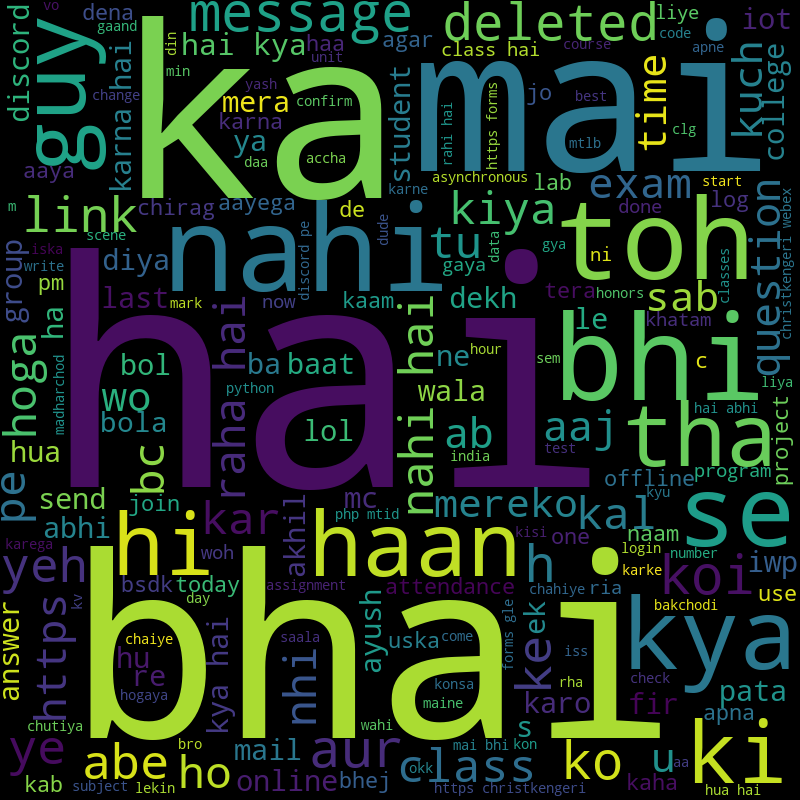

In [14]:
wordcloud.to_image()

##Q 3)Most Usage - Time of Day

In [15]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

KeyError: ignored